### Modelling

In [51]:
import numpy as np
import pandas as pd

In [52]:
df = pd.read_csv("label_features.csv")

In [53]:
df['datetime']=pd.to_datetime(df['datetime'])

In [54]:
last_train_date = pd.to_datetime('2015-07-31 01:00:00')
first_test_date = pd.to_datetime('2015-08-01 01:00:00')

In [55]:
y_train = df.loc[df['datetime'] < last_train_date, 'failure']

In [56]:
y_train

0         none
1         none
2         none
3         none
4         none
          ... 
290102    none
290103    none
290104    none
290105    none
290106    none
Name: failure, Length: 167922, dtype: object

In [174]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
encoder.fit(y_train)
y_encoded=encoder.transform(y_train)

In [175]:
le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(le_name_mapping)

{'comp1': 0, 'comp2': 1, 'comp3': 2, 'comp4': 3, 'none': 4}


In [178]:
encoder.inverse_transform(y_encoded)

array(['none', 'none', 'none', ..., 'none', 'none', 'none'], dtype=object)

In [57]:
X_train = pd.get_dummies(df.loc[df['datetime'] < last_train_date].drop(['datetime','machineID','failure'], 1))

In [58]:
X_train

,volt_mean_3h,rotate_mean_3h,pressure_mean_3h,vibration_mean_3h,volt_sd_3h,rotate_sd_3h,pressure_sd_3h,vibration_sd_3h,volt_mean_24h,rotate_mean_24h,...,error5count,comp1,comp2,comp3,comp4,age,model_model1,model_model2,model_model3,model_model4
0,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,...,0.0,20.000,215.000,155.000,170.000,18,0,0,1,0
1,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,...,0.0,20.125,215.125,155.125,170.125,18,0,0,1,0
2,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,...,0.0,20.250,215.250,155.250,170.250,18,0,0,1,0
3,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,171.243444,444.233563,...,0.0,20.375,215.375,155.375,170.375,18,0,0,1,0
4,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,170.792486,448.440437,...,0.0,20.500,215.500,155.500,170.500,18,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290102,181.789600,443.816655,95.819894,39.563678,4.020958,16.224728,7.755167,2.474557,169.097102,443.777605,...,0.0,3.250,3.250,18.250,63.250,5,0,0,0,1
290103,173.083263,438.704284,94.424390,39.083103,11.783864,66.494982,9.682734,6.214271,169.631344,440.478164,...,0.0,3.375,3.375,18.375,63.375,5,0,0,0,1
290104,174.048390,433.016353,99.925802,40.676765,4.574859,25.076437,11.605534,5.577813,171.633464,441.192273,...,0.0,3.500,3.500,18.500,63.500,5,0,0,0,1
290105,167.883990,435.511531,96.602542,38.877619,10.131349,55.710554,1.266057,7.099589,172.057946,441.976196,...,0.0,3.625,3.625,18.625,63.625,5,0,0,0,1


In [59]:
X_test = pd.get_dummies(df.loc[df['datetime'] > first_test_date].drop(['datetime','machineID','failure'], 1))

In [60]:
X_test

,volt_mean_3h,rotate_mean_3h,pressure_mean_3h,vibration_mean_3h,volt_sd_3h,rotate_sd_3h,pressure_sd_3h,vibration_sd_3h,volt_mean_24h,rotate_mean_24h,...,error5count,comp1,comp2,comp3,comp4,age,model_model1,model_model2,model_model3,model_model4
1687,157.906797,436.223066,99.668710,41.927731,14.311694,48.891917,8.484343,5.750070,164.944552,441.048553,...,0.0,12.875,27.875,57.875,42.875,18,0,0,1,0
1688,177.484300,474.384707,95.465206,36.536615,11.467069,52.263950,7.914226,5.928830,164.661214,440.351473,...,0.0,13.000,28.000,58.000,43.000,18,0,0,1,0
1689,160.722230,454.141020,96.239534,37.227385,11.720061,60.893656,16.558994,0.510792,164.970697,440.269094,...,0.0,13.125,28.125,58.125,43.125,18,0,0,1,0
1690,164.327403,483.343506,93.766954,37.099411,11.158956,36.377145,5.826244,5.443107,163.763336,451.041246,...,0.0,13.250,28.250,58.250,43.250,18,0,0,1,0
1691,168.114265,459.958711,100.904301,40.966879,21.079445,70.966810,8.388908,4.248384,166.217269,456.208120,...,0.0,13.375,28.375,58.375,43.375,18,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291336,177.758754,458.391629,103.183160,46.846592,13.147011,75.100940,3.111700,3.576693,169.764418,454.478787,...,0.0,82.500,7.500,82.500,52.500,5,0,0,0,1
291337,166.078945,424.431184,98.344409,30.907459,29.351231,69.348245,16.940674,3.731256,171.547643,452.351565,...,0.0,82.625,7.625,82.625,52.625,5,0,0,0,1
291338,158.327984,504.056262,108.055441,40.109705,9.605817,78.036116,9.154932,3.379639,168.806645,459.502212,...,0.0,82.750,7.750,82.750,52.750,5,0,0,0,1
291339,170.306956,438.653616,102.346227,47.481232,8.457322,43.021553,0.785721,3.198928,169.011763,465.923073,...,0.0,82.875,7.875,82.875,52.875,5,0,0,0,1


In [61]:
X_test.shape,X_train.shape,y_train.shape

((122619, 30), (167922, 30), (167922,))

In [62]:
yf = pd.DataFrame(df.loc[df['datetime'] > first_test_date])

In [63]:
yf

,machineID,datetime,volt_mean_3h,rotate_mean_3h,pressure_mean_3h,vibration_mean_3h,volt_sd_3h,rotate_sd_3h,pressure_sd_3h,vibration_sd_3h,...,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
1687,1,2015-08-01 03:00:00,157.906797,436.223066,99.668710,41.927731,14.311694,48.891917,8.484343,5.750070,...,0.0,0.0,0.0,12.875,27.875,57.875,42.875,model3,18,none
1688,1,2015-08-01 06:00:00,177.484300,474.384707,95.465206,36.536615,11.467069,52.263950,7.914226,5.928830,...,0.0,0.0,0.0,13.000,28.000,58.000,43.000,model3,18,none
1689,1,2015-08-01 09:00:00,160.722230,454.141020,96.239534,37.227385,11.720061,60.893656,16.558994,0.510792,...,0.0,0.0,0.0,13.125,28.125,58.125,43.125,model3,18,none
1690,1,2015-08-01 12:00:00,164.327403,483.343506,93.766954,37.099411,11.158956,36.377145,5.826244,5.443107,...,0.0,0.0,0.0,13.250,28.250,58.250,43.250,model3,18,none
1691,1,2015-08-01 15:00:00,168.114265,459.958711,100.904301,40.966879,21.079445,70.966810,8.388908,4.248384,...,0.0,0.0,0.0,13.375,28.375,58.375,43.375,model3,18,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291336,100,2015-12-31 18:00:00,177.758754,458.391629,103.183160,46.846592,13.147011,75.100940,3.111700,3.576693,...,0.0,0.0,0.0,82.500,7.500,82.500,52.500,model4,5,none
291337,100,2015-12-31 21:00:00,166.078945,424.431184,98.344409,30.907459,29.351231,69.348245,16.940674,3.731256,...,0.0,0.0,0.0,82.625,7.625,82.625,52.625,model4,5,none
291338,100,2016-01-01 00:00:00,158.327984,504.056262,108.055441,40.109705,9.605817,78.036116,9.154932,3.379639,...,0.0,0.0,0.0,82.750,7.750,82.750,52.750,model4,5,none
291339,100,2016-01-01 03:00:00,170.306956,438.653616,102.346227,47.481232,8.457322,43.021553,0.785721,3.198928,...,0.0,0.0,0.0,82.875,7.875,82.875,52.875,model4,5,none


In [64]:
y_test = yf['failure'] 

In [65]:
y_test

1687      none
1688      none
1689      none
1690      none
1691      none
          ... 
291336    none
291337    none
291338    none
291339    none
291340    none
Name: failure, Length: 122619, dtype: object

In [182]:
y_test_encoded = encoder.transform(y_test)

<a id='adaboost'></a>

## AdaBoost

In [138]:
from sklearn.ensemble import AdaBoostClassifier
adc = AdaBoostClassifier(random_state=22)
adc.fit(X_train,y_encoded)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=22)

In [159]:
y_train_pred=adc.predict(X_train)

### Predict

In [140]:
y_pred = adc.predict(X_test)


array([4, 4, 4, ..., 4, 4, 4])

In [179]:
y_pred.shape

(122619,)

### evaluate on train

Text(0, 0.5, 'Importance')

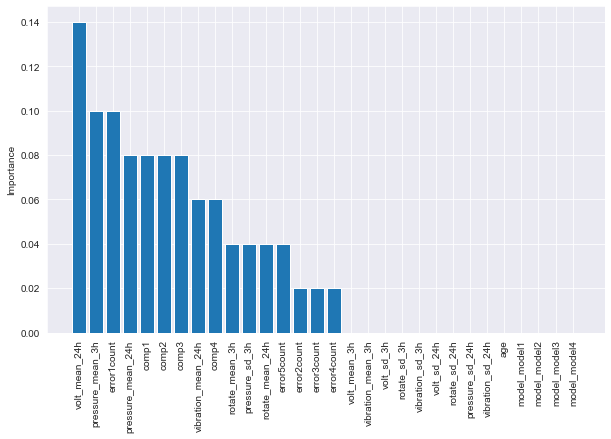

In [180]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import operator

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
labels, importances = zip(*sorted(zip(X_train.columns, adc.feature_importances_),
                                  reverse=True,
                                  key=operator.itemgetter(1)))
plt.xticks(range(len(labels)), labels)
_, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.bar(range(len(importances)), importances)
plt.ylabel('Importance')

### Inspect Quality on test

In [183]:
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, y_pred, target_names=encoder.classes_))

              precision    recall  f1-score   support

       comp1       0.88      0.92      0.90        66
       comp2       0.95      0.93      0.94       112
       comp3       0.93      0.79      0.85        52
       comp4       0.94      0.86      0.90        73
        none       1.00      1.00      1.00    122316

    accuracy                           1.00    122619
   macro avg       0.94      0.90      0.92    122619
weighted avg       1.00      1.00      1.00    122619



### Save model

In [71]:
from sklearn.externals import joblib
joblib.dump(adc,'adc.pkl')

/Users/ravissa/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['adc.pkl']

In [72]:
###clf_RF = joblib.load('./data/model/rf.pkl')

### compare the Predicted Results to Actual results

In [214]:
test_results=[]
test_result = pd.DataFrame(df.loc[df['datetime'] > first_test_date])
test_result['predicted_failure'] = adc.predict(X_test)
test_results.append(test_result)
test_result['failure'].value_counts(), test_result['predicted_failure'].value_counts()

(none     122316
 comp2       112
 comp4        73
 comp1        66
 comp3        52
 Name: failure, dtype: int64, 4    122329
 1       110
 0        69
 3        67
 2        44
 Name: predicted_failure, dtype: int64)

In [215]:
print(le_name_mapping)

{'comp1': 0, 'comp2': 1, 'comp3': 2, 'comp4': 3, 'none': 4}


#### FINE TUNE

In [187]:
from sklearn.model_selection import GridSearchCV

In [188]:
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

#### This param_grid tells Scikit-Learn to first evaluate all 3 × 4 = 12 combinations of n_estimators and max_features hyperparameter values specified in the first dict then try all 2 × 3 = 6 combinations of hyperparameter values in the second dict, but this time with the bootstrap hyperparameter set to False instead of True (which is the default value for this hyperparameter).

###### All in all, the grid search will explore 12 + 6 = 18 combinations of RandomForestClassifier hyperparameter values, and it will train each model five times (since we areusing five-fold cross validation). In other words, all in all, there will be 18 × 5 = 90 rounds of training.

In [189]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=20)



In [190]:
grid_search = GridSearchCV(rfc, param_grid, cv=5)

In [191]:
grid_search.fit(X_train,y_encoded)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=20,
                                  

In [192]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [193]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

In [194]:
grid_search.cv_results_

{'mean_fit_time': array([0.39064984, 1.18330531, 3.37037616, 0.54585223, 1.69334059,
        5.00230913, 0.67230849, 2.12616448, 6.15315571, 0.82158637,
        2.54809003, 7.25805898, 0.55670328, 1.67733569, 0.67591109,
        1.8861414 , 0.75833664, 2.48663692]),
 'std_fit_time': array([0.04232951, 0.07338958, 0.16434369, 0.04036037, 0.15746373,
        0.14524043, 0.06530316, 0.0940341 , 0.16824593, 0.11627151,
        0.27502357, 0.33251411, 0.02705512, 0.16631906, 0.06619642,
        0.06824554, 0.10354115, 0.18002564]),
 'mean_score_time': array([0.01723118, 0.02857656, 0.06239047, 0.0153378 , 0.02576356,
        0.05978408, 0.01563435, 0.02512465, 0.05304875, 0.0158958 ,
        0.02384529, 0.04982772, 0.01656823, 0.03009806, 0.01573172,
        0.02634339, 0.01563873, 0.02528911]),
 'std_score_time': array([0.00125307, 0.00189214, 0.00248948, 0.00084926, 0.00080885,
        0.00560553, 0.00155102, 0.00078511, 0.00157516, 0.0018924 ,
        0.00051097, 0.00057673, 0.00124059, 

In [195]:
grid_search.best_estimator_.feature_importances_

array([0.0277548 , 0.01912113, 0.02423423, 0.02225414, 0.0057519 ,
       0.00539107, 0.00477575, 0.00555263, 0.06146593, 0.0486075 ,
       0.02650437, 0.03383069, 0.00614625, 0.00593231, 0.00530596,
       0.00673674, 0.02775477, 0.02889649, 0.03761334, 0.02536053,
       0.03826302, 0.12776822, 0.17082636, 0.08653807, 0.13346877,
       0.008316  , 0.00248417, 0.0005693 , 0.00169471, 0.00108085])

Text(0, 0.5, 'Importance')

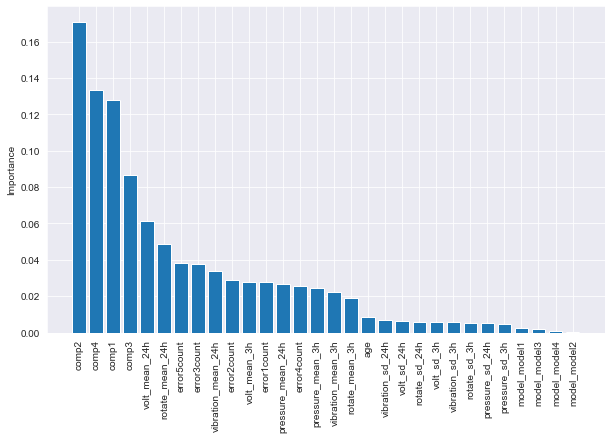

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns
import operator

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
labels, importances = zip(*sorted(zip(X_train.columns, grid_search.best_estimator_.feature_importances_),
                                  reverse=True,
                                  key=operator.itemgetter(1)))
plt.xticks(range(len(labels)), labels)
_, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.bar(range(len(importances)), importances)
plt.ylabel('Importance')

<a id='gbclassifier'></a>

### GradientBoostingClassifier

In [203]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train,y_encoded)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [204]:
y_train_pred=gbc.predict(X_train)


In [205]:
y_pred = gbc.predict(X_test)

Text(0, 0.5, 'Importance')

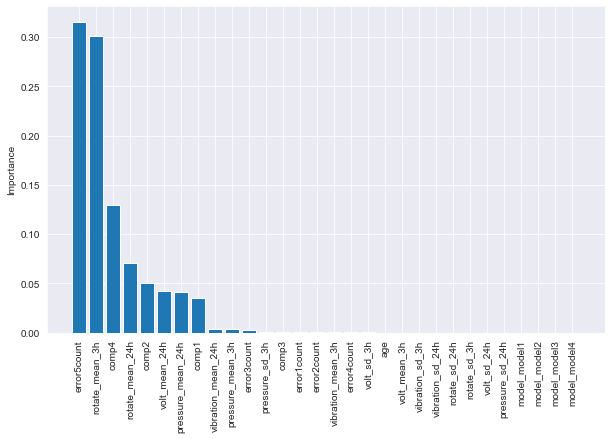

In [206]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import operator

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
labels, importances = zip(*sorted(zip(X_train.columns, gbc.feature_importances_),
                                  reverse=True,
                                  key=operator.itemgetter(1)))
plt.xticks(range(len(labels)), labels)
_, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.bar(range(len(importances)), importances)
plt.ylabel('Importance')

In [207]:
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, y_pred, target_names=encoder.classes_))

              precision    recall  f1-score   support

       comp1       0.33      0.80      0.47        66
       comp2       0.85      0.30      0.45       112
       comp3       0.19      0.94      0.32        52
       comp4       0.33      0.01      0.03        73
        none       1.00      1.00      1.00    122316

    accuracy                           1.00    122619
   macro avg       0.54      0.61      0.45    122619
weighted avg       1.00      1.00      1.00    122619



<a id='rfclassifier'></a>

### RandomForestClassifier

In [217]:
from sklearn.ensemble import RandomForestClassifier
rnd = RandomForestClassifier(random_state=32)
rnd.fit(X_train,y_encoded)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=32, verbose=0,
                       warm_start=False)

<a id='bgclassifier'></a>

In [218]:
y_train_pred=rnd.predict(X_train)

In [219]:
y_pred = rnd.predict(X_test)

Text(0, 0.5, 'Importance')

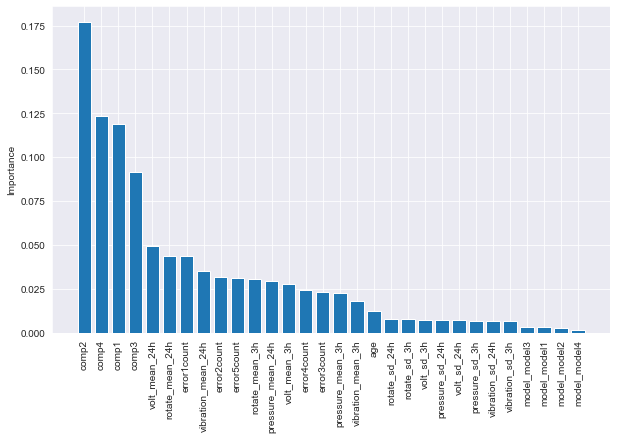

In [220]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import operator

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
labels, importances = zip(*sorted(zip(X_train.columns, rnd.feature_importances_),
                                  reverse=True,
                                  key=operator.itemgetter(1)))
plt.xticks(range(len(labels)), labels)
_, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.bar(range(len(importances)), importances)
plt.ylabel('Importance')

In [221]:
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, y_pred, target_names=encoder.classes_))

              precision    recall  f1-score   support

       comp1       0.94      0.92      0.93        66
       comp2       0.92      0.98      0.95       112
       comp3       1.00      0.87      0.93        52
       comp4       0.93      0.92      0.92        73
        none       1.00      1.00      1.00    122316

    accuracy                           1.00    122619
   macro avg       0.96      0.94      0.95    122619
weighted avg       1.00      1.00      1.00    122619



### Bagging Classifier

In [222]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
        DecisionTreeClassifier(), n_estimators=500,
        max_samples=100,bootstrap=True,n_jobs=-1
    )

In [223]:
bag_clf.fit(X_train,y_encoded)


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [224]:
y_train_pred=bag_clf.predict(X_train)

In [225]:
y_pred = bag_clf.predict(X_test)

Text(0, 0.5, 'Importance')

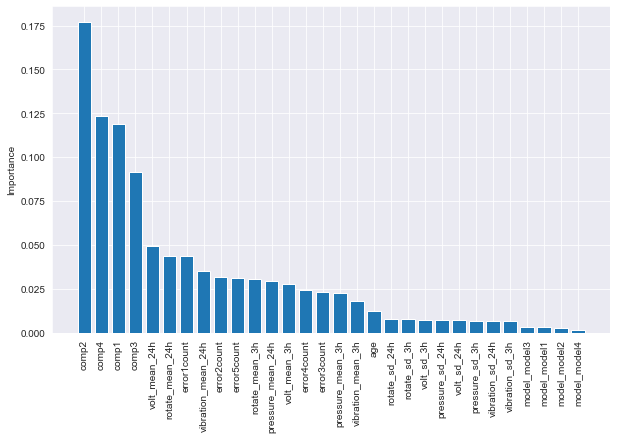

In [226]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import operator

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
labels, importances = zip(*sorted(zip(X_train.columns, bag_clf.feature_importances_),
                                  reverse=True,
                                  key=operator.itemgetter(1)))
plt.xticks(range(len(labels)), labels)
_, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.bar(range(len(importances)), importances)
plt.ylabel('Importance')

In [227]:
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, y_pred, target_names=encoder.classes_))

              precision    recall  f1-score   support

       comp1       0.00      0.00      0.00        66
       comp2       0.00      0.00      0.00       112
       comp3       0.00      0.00      0.00        52
       comp4       0.00      0.00      0.00        73
        none       1.00      1.00      1.00    122316

    accuracy                           1.00    122619
   macro avg       0.20      0.20      0.20    122619
weighted avg       1.00      1.00      1.00    122619



/Users/ravissa/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### End of the block for Bagging Classifier

<a id='dtclassifier'></a>

### Decision Tree

In [228]:
from sklearn.tree import DecisionTreeClassifier
dst = DecisionTreeClassifier(random_state=12)
dst.fit(X_train,y_encoded)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12, splitter='best')

In [229]:
y_train_pred=dst.predict(X_train)

In [230]:
y_pred = dst.predict(X_test)

Text(0, 0.5, 'Importance')

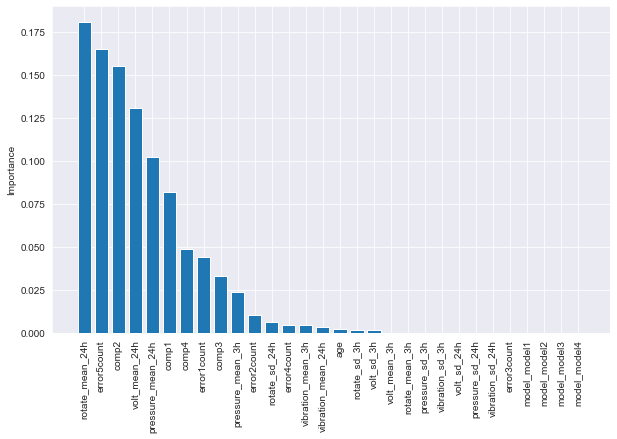

In [231]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import operator

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
labels, importances = zip(*sorted(zip(X_train.columns, dst.feature_importances_),
                                  reverse=True,
                                  key=operator.itemgetter(1)))
plt.xticks(range(len(labels)), labels)
_, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.bar(range(len(importances)), importances)
plt.ylabel('Importance')

In [232]:
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, y_pred, target_names=encoder.classes_))

              precision    recall  f1-score   support

       comp1       0.87      0.94      0.91        66
       comp2       0.90      0.99      0.94       112
       comp3       0.95      0.79      0.86        52
       comp4       0.98      0.85      0.91        73
        none       1.00      1.00      1.00    122316

    accuracy                           1.00    122619
   macro avg       0.94      0.91      0.92    122619
weighted avg       1.00      1.00      1.00    122619



<a id='sgd'></a>

### SGD

In [235]:
from sklearn.linear_model import SGDClassifier
svm = SGDClassifier(random_state=12)
svm.fit(X_train,y_encoded)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=12, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [236]:
y_train_pred=svm.predict(X_train)

In [237]:
y_pred = svm.predict(X_test)

In [239]:
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, y_pred, target_names=encoder.classes_))

              precision    recall  f1-score   support

       comp1       0.34      0.33      0.34        66
       comp2       0.44      0.54      0.48       112
       comp3       0.50      0.02      0.04        52
       comp4       1.00      0.03      0.05        73
        none       1.00      1.00      1.00    122316

    accuracy                           1.00    122619
   macro avg       0.65      0.38      0.38    122619
weighted avg       1.00      1.00      1.00    122619



<a id='lrclassifier'></a>

### Logistic Regression

In [240]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(random_state=22)
lgr.fit(X_train,y_encoded)

/Users/ravissa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=22, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [241]:
y_train_pred=lgr.predict(X_train)

In [242]:
y_pred = lgr.predict(X_test)

In [243]:
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, y_pred, target_names=encoder.classes_))

              precision    recall  f1-score   support

       comp1       0.31      0.30      0.31        66
       comp2       0.32      0.37      0.34       112
       comp3       0.24      0.17      0.20        52
       comp4       0.50      0.12      0.20        73
        none       1.00      1.00      1.00    122316

    accuracy                           1.00    122619
   macro avg       0.47      0.39      0.41    122619
weighted avg       1.00      1.00      1.00    122619



### Classification 

[AdaBoost](#adaboost)

[GradientBoostingClassifier](#gbclassifier)

[RandomForestClassifier](#rfclassifier)

[BaggingClassifier](#bgclassifier)

[DecisionTree Classifier](#dtclassifier)

[SGD](#sgd)

[Logistic Regression](#lrclassifier)